# Concrete Strength Indicator
Life cycle of Machine learning Project

•	Understanding the Problem Statement

•	Data Collection

•	Data Checks to perform

•	Exploratory data analysis

•	Data Pre-Processing

•	Model Training

•	Choose best model



1) Problem statement
The quality of concrete is determined by its compressive strength, which is measured using a conventional crushing test on a concrete cylinder. The strength of the concrete is also a vital aspect in achieving the requisite longevity. It will take 28 days to test strength, which is a long period. So, what will we do now? We can save a lot of time and effort by using Data Science to estimate how much quantity of which raw material we need for acceptable compressive strength.


2) Data Collection
•	Dataset Source - https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set
•	The data consists of 9 column and 1030 rows.


2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn , warings Library.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r"F:\7days_MLproject\Notebook\Data\concrete_data.csv")

Show Top 5 Records

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Shape of Dataset

In [5]:
df.shape

(1030, 9)

2.2  Dataset information

	Name -- Data Type -- Measurement -- Description
    
•	Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

•	Age -- quantitative -- Day (1~365) -- Input Variable

•	Concrete compressive strength -- quantitative -- MPa -- Output Variable


3. Data Checks to perform

•	Check Missing values

•	Check Duplicates

•	Check data type

•	Check statistics of data set


 3.1 Check Missing values

In [6]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

There are no missing values in dataset

3.2 Check duplicates

In [7]:
df.duplicated().sum()

25

There are 25 duplicated values in the dataset.
Dropping all the duplicated values.

In [8]:
df.drop_duplicates(inplace=True)

3.3 Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


3.4 Check statistics of data set

In [10]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
df[(list(df.columns))].corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


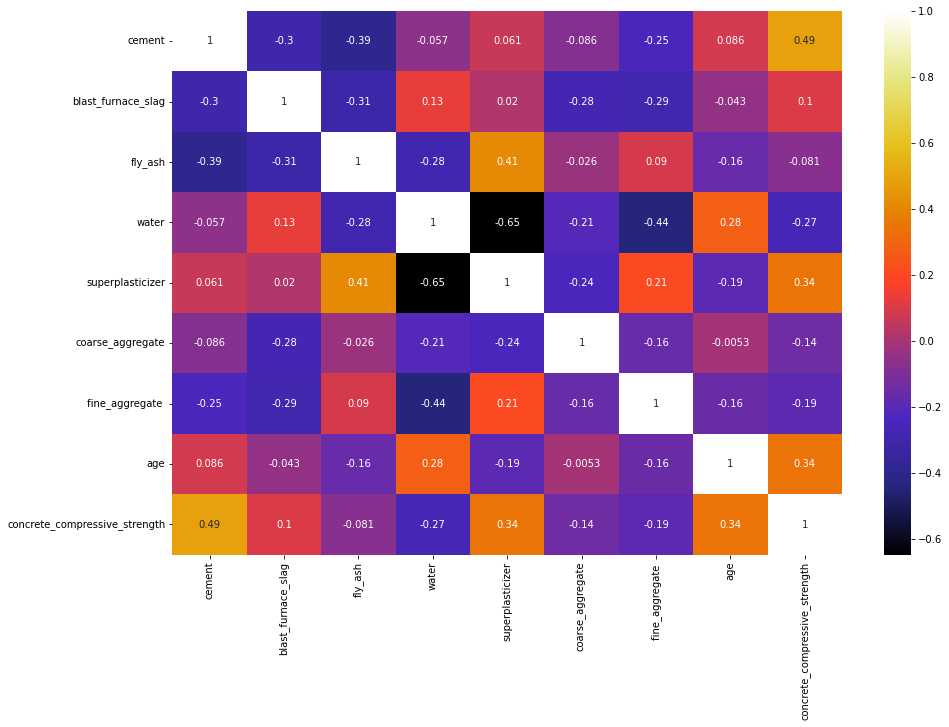

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()

Observations:

•	Cement have the highest correlation with compressive strength and second one is superplasticizer.

•	fly_ash,water,coarse_aggregate,fine_aggregate have negative correlation with compressive strength.


Feature Engineering

1. Numerical Feature

In [37]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 9


2. Categorical Feature

In [38]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Numerical Features :', len(cat_features))

Num of Numerical Features : 0


3. Descrete Feature

In [39]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))

Num of Discrete Features : 1


Observation:
    
• There are 9 numerical features in the dataset,amongs which one is discrete.

• There are no categorical features in the dataset.
